# Heart Attack: Who is at risk?

#### Introduction:

Heart attacks are one of the main causes of death in the world. Back in 2019, approximately **18 million** people died from Cardiovascular diseases, representing **32%** of global deaths for that year. Heart attacks and strokes represent over **85%** of those deaths. But what is a heart attack? During its ocurence, a lack of blood flow causes the tissue in the heart muscle to die. It occurs when the flow of blood to the heart is severely reduced or blocked. In other words, it is sudden, unexpected and usually fatal. The goal of this project is to predict if a person is at risk of having a heart attack.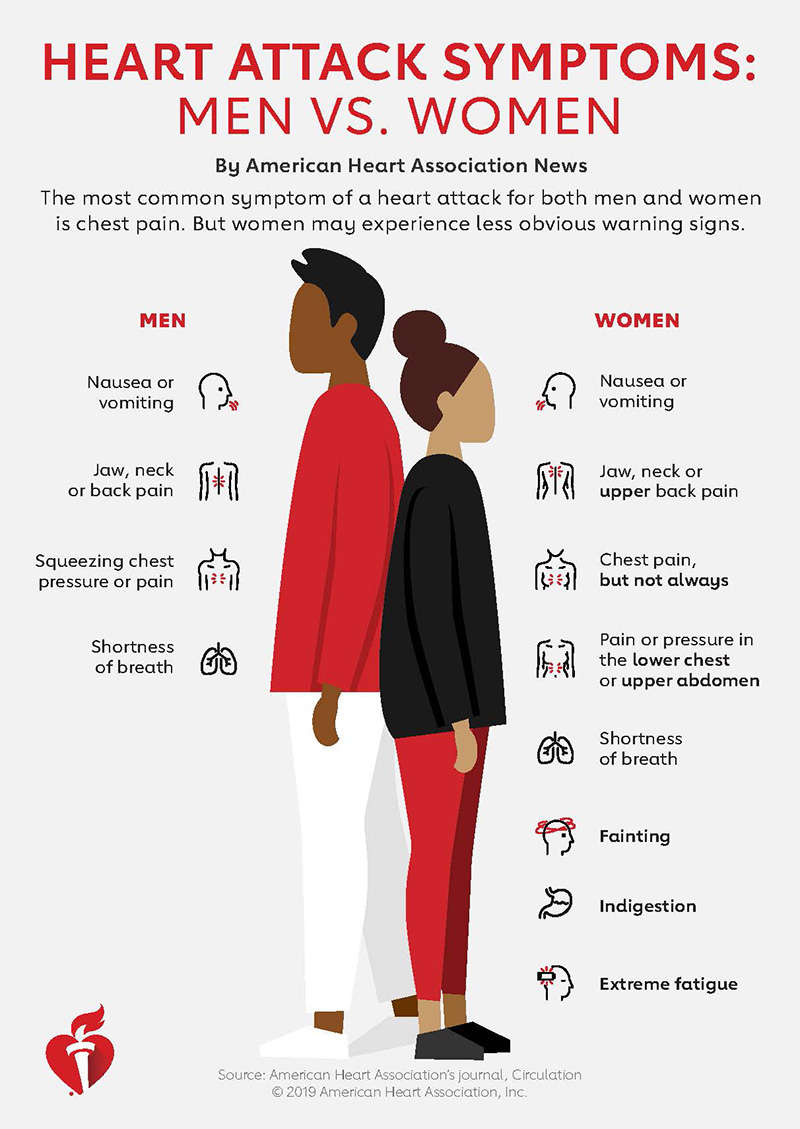

#### Our data:

The data we are working on today was taken from Kaggle. Click the following to access it [OUR DATA](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [1]:
#import all the necessary packages (this will be updated every step along the way)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading our data

Our data is a CSV file 

In [2]:
data = pd.read_csv("/Users/raouz/Desktop/Capstone Project: Heart Attack Prediction/data/raw/heart.csv")

### Data wrangling

Now that our data is in our notebook, it's time to learn about it and clean it up.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
original_columns = data.columns
print(original_columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [9]:
data.shape

(303, 14)

Based on our data documentation we have the following:


-Age : Age of the patient

-Sex : Sex of the patient

-exang: exercise induced angina (1 = yes; 0 = no)

-ca: number of major vessels (0-3)

-cp : Chest Pain type chest pain type

    -Value 1: typical angina
    -Value 2: atypical angina
    -Value 3: non-anginal pain
    -Value 4: asymptomatic

-trtbps : resting blood pressure (in mm Hg)

-chol : cholestoral in mg/dl fetched via BMI sensor

-fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

-rest_ecg : resting electrocardiographic results

    -Value 0: normal
    -Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
-thalach : maximum heart rate achieved

-target : 0= less chance of heart attack 1= more chance of heart attack

##### Let's rename our columns to make it more readable and easier to understand

In [11]:
data.rename(columns ={'age':'Age','sex':'Sex',"caa":"MajorVessels",'trtbps':'RestBloodP','cp':'ChestPain','thalachh':'thalach','restecg':'RestEcg'}, inplace =True)


In [12]:
data.head()

,Age,Sex,ChestPain,RestBloodP,chol,fbs,RestEcg,thalach,exng,oldpeak,slp,MajorVessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now let's learn more about the features values that we have.

In [16]:
#Lets get the number of occurences unique values for each feature
data.nunique()

Age              41
Sex               2
ChestPain         4
RestBloodP       49
chol            152
fbs               2
RestEcg           3
thalach          91
exng              2
oldpeak          40
slp               3
MajorVessels      5
thall             4
output            2
dtype: int64

It looks like our data has both numeric and categorial variables. Lets look closely:

In [20]:
#Print out what are these unique values for each column
for col in data.columns:
    print(col)
    print(data[col].value_counts())

Age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Age, dtype: int64
Sex
1    207
0     96
Name: Sex, dtype: int64
ChestPain
0    143
2     87
1     50
3     23
Name: ChestPain, dtype: int64
RestBloodP
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1


Therefore we can conclude that our numeric features are: Age, RestBloodP, chol, thalach, oldpeak and the rest are all categorial including our target!

While looking at our MajorVessels column, we noticed that the number 4 appears, even though it is not part of the allowed values, which vary from 0 to 3. This is definetrly a value that refers to a missing value. Only 5 rows have a value 4 for MajorVessels, and since our dataset is not large, we can replace rather than delete these values.


In [21]:
#replace all 4 with NaN so they won't affect our median calculation
data['MajorVessels'] =data['MajorVessels'].replace(4,np.NAN)

#caclulate the median without the 5 rowns
temp = data['MajorVessels'].median()
#replace the NaN with the median
data['MajorVessels'] = data['MajorVessels'].fillna(temp)

print(data['MajorVessels'].value_counts())

0.0    180
1.0     65
2.0     38
3.0     20
Name: MajorVessels, dtype: int64


Good! Now let's drop any duplicate rows, it there is any. The reason for that is that the chances of 2 people having the same exact data is rare, however, a data entry error is more common. Therefore, deleting these duplicate rows will help us build a more precise and unbiased model.


In [34]:
#Lets get the shape before
data.shape

(303, 14)

In [35]:
#Find out if there is any duplicate rows, if it returns True that means there are some
True in data.duplicated()

True

In [36]:
#Lets delete these rows and update our data
data = data.drop_duplicates()
data.shape

(302, 14)

#Only one row was a duplicate and now its gone.

Before we move to our EDA phase, we can take a look at our numerical values and the outlies.

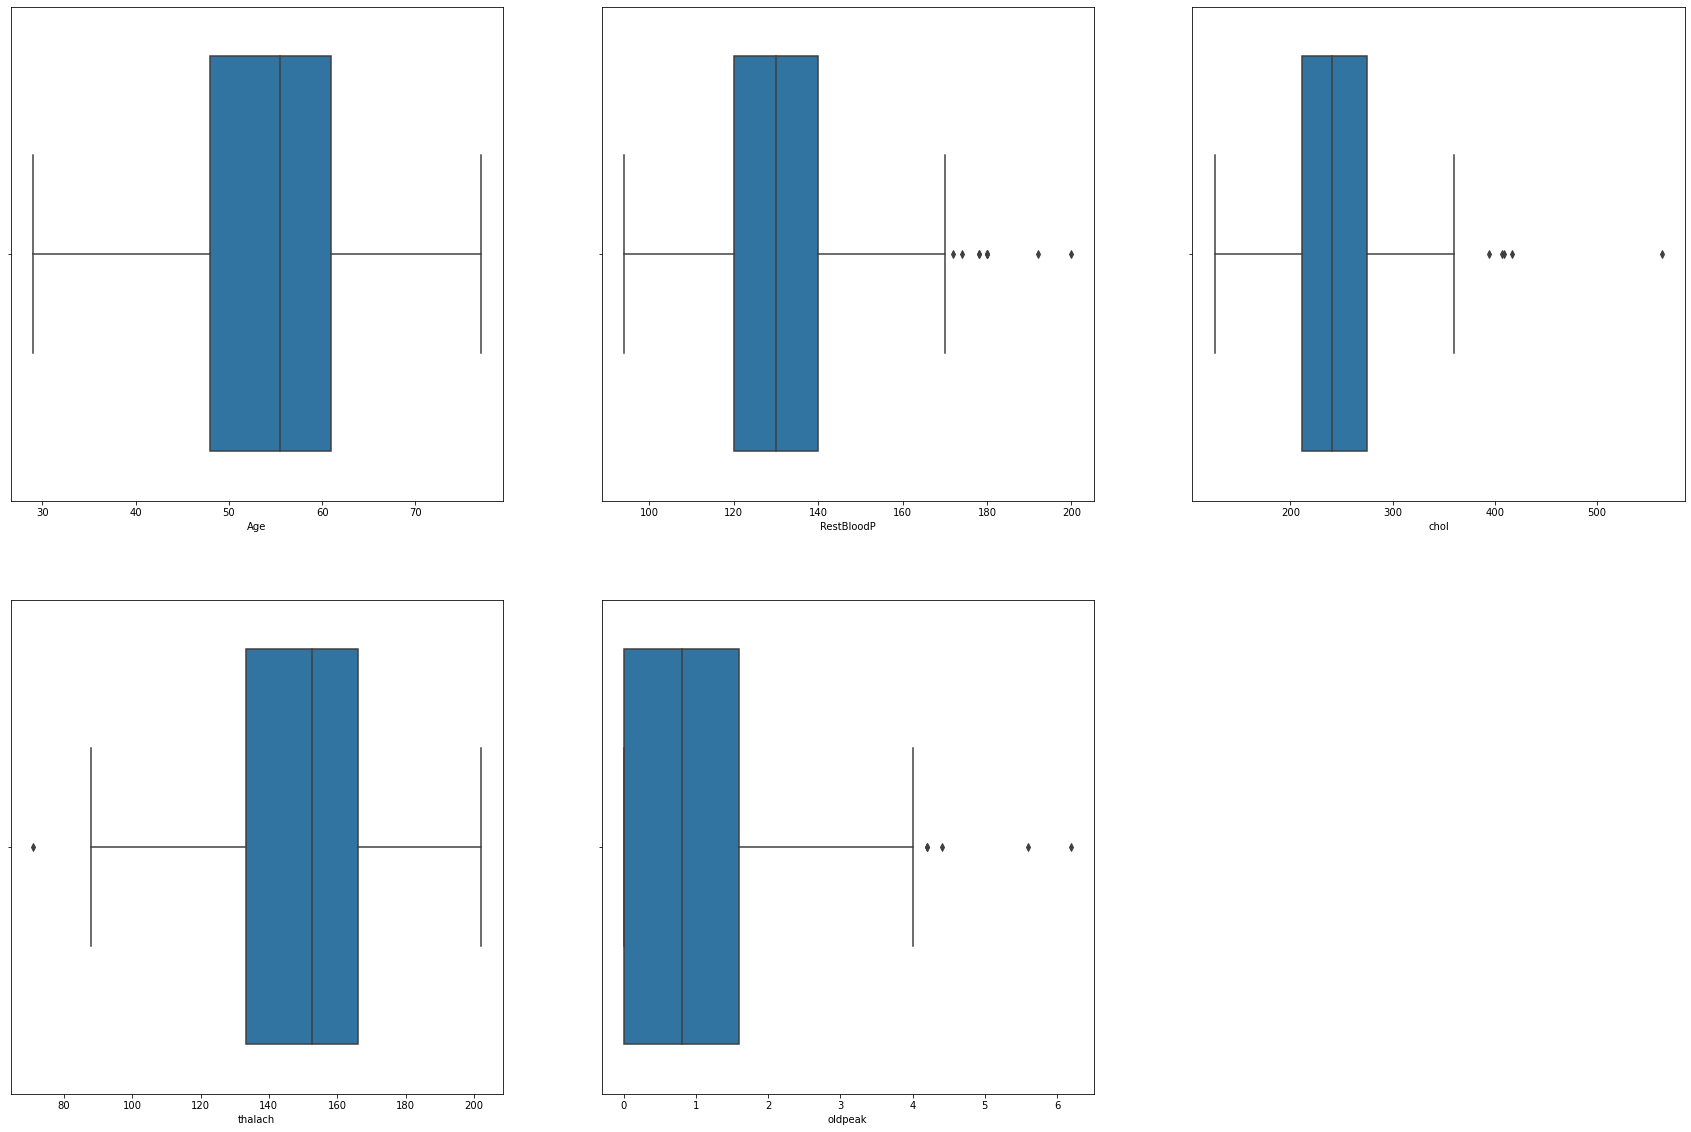

In [37]:
Numeric_vals= data[['Age', 'RestBloodP', 'chol', 'thalach', 'oldpeak']]
plt.figure(figsize = (30,20))

for row,col in enumerate(Numeric_vals):
    plt.subplot(2,3,row+1)
    sns.boxplot(data=Numeric_vals,x=Numeric_vals[col])

### Exploratoty Data Analysis